# Overview

This is the final script of the final project for Civic Analytics at NYC CUSP. It includes the following sections:

- Data Ingestion and Processing
- Modelling
- Data Exporting
- Analysis and Visualization

Models:
- K-Means
- Linear Regression
- Collaborative Filtering

Contributor
- Ian Xiao
- Ben Steers
- Te Du

---

## Data Ingestion and Processing

In [20]:
# Import
import numpy as np
import pandas as pd
from datetime import datetime

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

import matplotlib as plt
import matplotlib.style as style
style.use('fivethirtyeight')
%pylab inline

from IPython.display import HTML, display as d

pd.set_option('display.max_columns', 500)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Ingest data from project github
# Please see Data Processing script for detailed steps (TO BE UPLOADED)
url = "https://raw.githubusercontent.com/td928/CAUI_team1_Final_Project/master/merged-w-latlon.csv"
df = pd.read_csv(url)
df.head()

,BBL,EUI_2013,floorArea_2013,EUI_2014,floorArea_2014,EUI_2015,floorArea_2015,EUI_2016,floorArea_2016,Occupancy,TYPE_2016,water_intensity,naturalgas_use,Metered Areas (Energy),Metered Areas (Water),naturalgas_intensity,Borough,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,NumFloors,UnitsRes,UnitsTotal,YearBuilt,XCoord,YCoord,ZipCode,Address,Longitude,Latitude
0,1011860091,60.9,63121.0,70.9,58266.0,68.6,58266.0,68.3,58266.0,100.0,Multifamily Housing,26.45,67417.0,Whole Building,Whole Building,1.157056,MN,6641,58266,0,58266,0,0,12.0,25,25,1910,989141.0,225102.0,10024.0,316 WEST 79 STREET,-73.982338,40.784528
1,1000167501,64.9,199141.0,74.2,220821.0,77.0,220821.0,76.2,220821.0,100.0,Multifamily Housing,52.01,10441275.8,Whole Building,Whole Building,47.283890,MN,16951,179174,1092,177488,0,1092,25.0,238,239,1985,979290.0,197895.0,10280.0,377 RECTOR PLACE,-74.017891,40.709851
2,1000167502,71.5,150667.0,74.8,150855.0,41.1,150855.0,74.2,150855.0,100.0,Multifamily Housing,44.60,2332818.2,Whole Building,Whole Building,15.463977,MN,27838,123284,11136,112148,0,0,15.0,133,133,1986,979379.0,197988.0,10280.0,350 ALBANY STREET,-74.017570,40.710107
3,1000167504,74.6,112312.0,77.7,91774.0,73.3,91774.0,71.7,91774.0,100.0,Multifamily Housing,39.22,4395045.3,Whole Building,Not Available,47.889874,MN,16108,72913,4295,68618,0,4295,9.0,107,110,1986,979576.0,197918.0,10280.0,300 ALBANY STREET,-74.016859,40.709915
4,1000167505,116.7,235366.0,106.2,257092.0,106.7,257092.0,101.7,257092.0,100.0,Multifamily Housing,56.40,16783196.3,Whole Building,Not Available,65.280897,MN,23910,203837,1177,202660,1177,0,26.0,246,247,1987,979243.0,197613.0,10280.0,380 RECTOR PLACE,-74.018060,40.709077


In [3]:
df.dtypes

BBL                         int64
EUI_2013                  float64
floorArea_2013            float64
EUI_2014                  float64
floorArea_2014            float64
EUI_2015                  float64
floorArea_2015            float64
EUI_2016                  float64
floorArea_2016            float64
Occupancy                 float64
TYPE_2016                  object
water_intensity           float64
naturalgas_use            float64
Metered Areas (Energy)     object
Metered Areas  (Water)     object
naturalgas_intensity      float64
Borough                    object
LotArea                     int64
BldgArea                    int64
ComArea                     int64
ResArea                     int64
OfficeArea                  int64
RetailArea                  int64
NumFloors                 float64
UnitsRes                    int64
UnitsTotal                  int64
YearBuilt                   int64
XCoord                    float64
YCoord                    float64
ZipCode       

In [4]:
# Create a Age feature based on Built Year
df["age"] = datetime.datetime.now().year - df['YearBuilt']

# Create Average EUI of 2013, 2014, and 2015
df["avgEUI"] = df[['EUI_2013', 'EUI_2014', 'EUI_2015']].mean(axis=1)

df.head(10)

,BBL,EUI_2013,floorArea_2013,EUI_2014,floorArea_2014,EUI_2015,floorArea_2015,EUI_2016,floorArea_2016,Occupancy,TYPE_2016,water_intensity,naturalgas_use,Metered Areas (Energy),Metered Areas (Water),naturalgas_intensity,Borough,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,NumFloors,UnitsRes,UnitsTotal,YearBuilt,XCoord,YCoord,ZipCode,Address,Longitude,Latitude,age,avgEUI
0,1011860091,60.9,63121.0,70.9,58266.0,68.6,58266.0,68.3,58266.0,100.0,Multifamily Housing,26.45,67417.0,Whole Building,Whole Building,1.157056,MN,6641,58266,0,58266,0,0,12.0,25,25,1910,989141.0,225102.0,10024.0,316 WEST 79 STREET,-73.982338,40.784528,107,66.800000
1,1000167501,64.9,199141.0,74.2,220821.0,77.0,220821.0,76.2,220821.0,100.0,Multifamily Housing,52.01,10441275.8,Whole Building,Whole Building,47.283890,MN,16951,179174,1092,177488,0,1092,25.0,238,239,1985,979290.0,197895.0,10280.0,377 RECTOR PLACE,-74.017891,40.709851,32,72.033333
2,1000167502,71.5,150667.0,74.8,150855.0,41.1,150855.0,74.2,150855.0,100.0,Multifamily Housing,44.60,2332818.2,Whole Building,Whole Building,15.463977,MN,27838,123284,11136,112148,0,0,15.0,133,133,1986,979379.0,197988.0,10280.0,350 ALBANY STREET,-74.017570,40.710107,31,62.466667
3,1000167504,74.6,112312.0,77.7,91774.0,73.3,91774.0,71.7,91774.0,100.0,Multifamily Housing,39.22,4395045.3,Whole Building,Not Available,47.889874,MN,16108,72913,4295,68618,0,4295,9.0,107,110,1986,979576.0,197918.0,10280.0,300 ALBANY STREET,-74.016859,40.709915,31,75.200000
4,1000167505,116.7,235366.0,106.2,257092.0,106.7,257092.0,101.7,257092.0,100.0,Multifamily Housing,56.40,16783196.3,Whole Building,Not Available,65.280897,MN,23910,203837,1177,202660,1177,0,26.0,246,247,1987,979243.0,197613.0,10280.0,380 RECTOR PLACE,-74.018060,40.709077,30,109.866667
5,1000167506,77.3,111398.0,80.2,106631.0,80.3,106631.0,77.2,106631.0,100.0,Multifamily Housing,41.26,5756290.8,Whole Building,Whole Building,53.983277,MN,15000,81667,502,81165,0,502,9.0,121,122,1985,979576.0,197463.0,10280.0,280 RECTOR PLACE,-74.016859,40.708666,32,79.266667
6,1000167507,56.6,163863.0,62.0,129176.0,62.1,129176.0,61.9,129176.0,100.0,Multifamily Housing,43.29,6951841.3,Whole Building,Whole Building,53.816818,MN,25978,106271,3168,103103,0,3168,9.0,153,154,1986,979385.0,197552.0,10280.0,300 RECTOR PLACE,-74.017548,40.708910,31,60.233333
7,1000167508,91.6,517639.0,93.1,590974.0,93.3,590974.0,86.9,590974.0,100.0,Multifamily Housing,48.08,31758766.1,Whole Building,Whole Building,53.739701,MN,37248,428589,4750,423839,1640,3110,44.0,545,547,1987,979703.0,197392.0,10280.0,200 RECTOR PLACE,-74.016401,40.708471,30,92.666667
8,1000167509,160.0,225262.0,108.1,237270.0,89.0,237270.0,100.0,237270.0,100.0,Multifamily Housing,69.24,11837980.8,Whole Building,Not Available,49.892447,MN,45203,194762,32279,162483,0,28464,9.0,182,184,1988,979227.0,197334.0,10280.0,21 SOUTH END AVENUE,-74.018117,40.708312,29,119.033333
9,1000167510,66.9,296200.0,74.7,348953.0,80.3,348953.0,78.3,348953.0,100.0,Multifamily Housing,40.76,15207412.8,Whole Building,Whole Building,43.580118,MN,24167,251929,7464,244465,6885,0,28.0,293,294,1988,979649.0,197083.0,10280.0,99 BATTERY PLACE,-74.016595,40.707623,29,73.966667


In [5]:
print("--- Number of Missing Value in Each Column ---")
d(df.isnull().sum())
len_before = len(df)

# Drop rows with any missing value
model_df = df.dropna()
len(model_df) - len_before, 'dropped'

--- Number of Missing Value in Each Column ---


BBL                       0
EUI_2013                  0
floorArea_2013            0
EUI_2014                  0
floorArea_2014            0
EUI_2015                  0
floorArea_2015            0
EUI_2016                  0
floorArea_2016            0
Occupancy                 0
TYPE_2016                 0
water_intensity           0
naturalgas_use            0
Metered Areas (Energy)    0
Metered Areas  (Water)    0
naturalgas_intensity      0
Borough                   0
LotArea                   0
BldgArea                  0
ComArea                   0
ResArea                   0
OfficeArea                0
RetailArea                0
NumFloors                 0
UnitsRes                  0
UnitsTotal                0
YearBuilt                 0
XCoord                    0
YCoord                    0
ZipCode                   0
Address                   0
Longitude                 0
Latitude                  0
age                       0
avgEUI                    0
dtype: int64

(0, 'dropped')

In [6]:
# Select only Multi-family buildings for Modelling 

model_df = model_df[(model_df.TYPE_2016 == 'Multifamily Housing')]
print("Number of Records in the Modelling Dataset: {}".format(model_df.shape[0]))

Number of Records in the Modelling Dataset: 3538


--- 

## Modelling
- Calculate EER, WER, NER using K-Means
- Calculate EER, WER, NER using Linear Regression

EER Calculation:
- In K-Means, EER = actual EUI 2016 / K-mean Group EUI 2016.
- In Linear Regression, EER = actual EUI 2016 / Predicted EUI 2016

In [7]:
model_df.dtypes

BBL                         int64
EUI_2013                  float64
floorArea_2013            float64
EUI_2014                  float64
floorArea_2014            float64
EUI_2015                  float64
floorArea_2015            float64
EUI_2016                  float64
floorArea_2016            float64
Occupancy                 float64
TYPE_2016                  object
water_intensity           float64
naturalgas_use            float64
Metered Areas (Energy)     object
Metered Areas  (Water)     object
naturalgas_intensity      float64
Borough                    object
LotArea                     int64
BldgArea                    int64
ComArea                     int64
ResArea                     int64
OfficeArea                  int64
RetailArea                  int64
NumFloors                 float64
UnitsRes                    int64
UnitsTotal                  int64
YearBuilt                   int64
XCoord                    float64
YCoord                    float64
ZipCode       

In [8]:
# Perform K-Means

kmean_features = ['age', 'Occupancy', 'Latitude', 'Longitude', 'BldgArea', 'UnitsTotal', 'avgEUI']
init = 100
seed = 123

kmeans = KMeans(n_clusters=3, random_state = seed, n_init = init).fit(model_df[kmean_features])
model_df['km_group'] = kmeans.predict(model_df[kmean_features])

# @IAN updat

In [9]:
model_df.groupby('km_group').size()

km_group
0    2775
1     646
2     117
dtype: int64

# @IAN ~need to calculate stats for water and natural gas as well~

In [10]:
# Calculate k-mean based EUI stats from Iteration 1
km_stats = pd.pivot_table(model_df, index= 'km_group', values= ["EUI_2016", "water_intensity", "naturalgas_intensity"],
                               aggfunc= [np.mean, np.median, min, max, np.std, np.size])

# Rename Columns by Joining with "_"
km_stats.columns = ["Group_"+"_".join((i,j)) for i,j in km_stats.columns]
km_stats = km_stats.reset_index()

km_stats

,km_group,Group_mean_EUI_2016,Group_mean_naturalgas_intensity,Group_mean_water_intensity,Group_median_EUI_2016,Group_median_naturalgas_intensity,Group_median_water_intensity,Group_min_EUI_2016,Group_min_naturalgas_intensity,Group_min_water_intensity,Group_max_EUI_2016,Group_max_naturalgas_intensity,Group_max_water_intensity,Group_std_EUI_2016,Group_std_naturalgas_intensity,Group_std_water_intensity,Group_size_EUI_2016,Group_size_naturalgas_intensity,Group_size_water_intensity
0,0,119.430847,50.164380,90.435564,82.1,55.978827,52.10,4.6,0.000000,0.00,37168.2,1239.036255,52143.20,1030.090827,40.597252,1021.338733,2775.0,2775.0,2775.0
1,1,180.765170,40.579067,51.208653,76.8,44.574002,48.03,0.4,0.067944,0.00,67937.0,501.815338,432.01,2670.220394,35.493561,29.400921,646.0,646.0,646.0
2,2,91.277778,66.260843,54.368547,79.9,61.427373,50.86,59.4,0.000000,21.99,188.6,138.119872,118.91,25.479292,36.722369,20.456162,117.0,117.0,117.0


In [11]:
# Merge with Original Modelling Dataset
km_df = model_df.merge(km_stats, how="left", left_on="km_group", right_on="km_group")

In [12]:
km_df.sample(10)

,BBL,EUI_2013,floorArea_2013,EUI_2014,floorArea_2014,EUI_2015,floorArea_2015,EUI_2016,floorArea_2016,Occupancy,TYPE_2016,water_intensity,naturalgas_use,Metered Areas (Energy),Metered Areas (Water),naturalgas_intensity,Borough,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,NumFloors,UnitsRes,UnitsTotal,YearBuilt,XCoord,YCoord,ZipCode,Address,Longitude,Latitude,age,avgEUI,km_group,Group_mean_EUI_2016,Group_mean_naturalgas_intensity,Group_mean_water_intensity,Group_median_EUI_2016,Group_median_naturalgas_intensity,Group_median_water_intensity,Group_min_EUI_2016,Group_min_naturalgas_intensity,Group_min_water_intensity,Group_max_EUI_2016,Group_max_naturalgas_intensity,Group_max_water_intensity,Group_std_EUI_2016,Group_std_naturalgas_intensity,Group_std_water_intensity,Group_size_EUI_2016,Group_size_naturalgas_intensity,Group_size_water_intensity
2715,3067710037,47.8,76422.0,51.9,76422.0,53.8,76422.0,52.0,76422.0,100.0,Multifamily Housing,34.22,2358100.2,Whole Building,Whole Building,30.856301,BK,12804,76422,9500,66922,0,0,8.0,51,52,2008,998345.0,162261.0,11229.0,3692 BEDFORD AVENUE,-73.949234,40.612034,9,51.166667,0,119.430847,50.16438,90.435564,82.1,55.978827,52.1,4.6,0.0,0.0,37168.2,1239.036255,52143.2,1030.090827,40.597252,1021.338733,2775.0,2775.0,2775.0
2336,3022390008,39.0,102000.0,44.9,114734.0,47.8,114734.0,43.8,114734.0,100.0,Multifamily Housing,79.00,3658225.3,Whole Building,Whole Building,31.884405,BK,25651,114734,0,114734,0,0,6.0,115,115,2002,996884.0,194437.0,11206.0,157 WALLABOUT STREET,-73.954436,40.700352,15,43.900000,0,119.430847,50.16438,90.435564,82.1,55.978827,52.1,4.6,0.0,0.0,37168.2,1239.036255,52143.2,1030.090827,40.597252,1021.338733,2775.0,2775.0,2775.0
2758,1021700083,53.5,75289.0,55.8,64962.0,35.6,64962.0,97.8,64962.0,100.0,Multifamily Housing,64.70,5631199.9,Whole Building,Whole Building,86.684522,MN,15000,64962,3000,61962,0,3000,6.0,73,78,1925,1003163.0,251841.0,10040.0,4500 BROADWAY,-73.931629,40.857900,92,48.300000,0,119.430847,50.16438,90.435564,82.1,55.978827,52.1,4.6,0.0,0.0,37168.2,1239.036255,52143.2,1030.090827,40.597252,1021.338733,2775.0,2775.0,2775.0
3356,1011500037,65.4,104238.0,52.7,104238.0,61.3,104238.0,64.9,104238.0,100.0,Multifamily Housing,35.57,5319706.3,Whole Building,Whole Building,51.034232,MN,9604,104238,0,104238,0,0,14.0,50,50,1925,990819.0,224171.0,10024.0,112 WEST 79 STREET,-73.976280,40.781971,92,59.800000,0,119.430847,50.16438,90.435564,82.1,55.978827,52.1,4.6,0.0,0.0,37168.2,1239.036255,52143.2,1030.090827,40.597252,1021.338733,2775.0,2775.0,2775.0
2357,1015190046,83.5,70056.0,93.6,62272.0,92.1,62272.0,84.7,62272.0,100.0,Multifamily Housing,50.60,4491355.6,Whole Building,Whole Building,72.124801,MN,10067,62272,0,62272,0,0,8.0,125,125,1941,997315.0,224274.0,10128.0,158 EAST 91 STREET,-73.952824,40.782247,76,89.733333,0,119.430847,50.16438,90.435564,82.1,55.978827,52.1,4.6,0.0,0.0,37168.2,1239.036255,52143.2,1030.090827,40.597252,1021.338733,2775.0,2775.0,2775.0
3221,2028000013,75.0,69000.0,67.6,69000.0,47.7,69000.0,72.7,69000.0,100.0,Multifamily Housing,37.22,3948200.1,Whole Building,Not Available,57.220291,BX,15250,69000,1000,68000,0,1000,6.0,60,61,1936,1010044.0,248030.0,10457.0,176 EAST 176 STREET,-73.906769,40.847422,81,63.433333,0,119.430847,50.16438,90.435564,82.1,55.978827,52.1,4.6,0.0,0.0,37168.2,1239.036255,52143.2,1030.090827,40.597252,1021.338733,2775.0,2775.0,2775.0
3289,2033070012,63.4,50000.0,120.4,63805.0,146.4,63805.0,115.9,63805.0,100.0,Multifamily Housing,87.91,5010741.0,Whole Building,Whole Building,78.532106,BX,15000,63805,2535,61270,0,0,6.0,50,50,1961,1016113.0,257208.0,10458.0,254 EAST 202 STREET,-73.884789,40.872593,56,110.066667,0,119.430847,50.16438,90.435564,82.1,55.978827,52.1,4.6,0.0,0.0,37168.2,1239.036255,52143.2,1030.090827,40.597252,1021.338733,2775.0,2775.0,2775.0
1595,2026070038,90.3,65000.0,94.1,54560.0,78.6,54560.0,80.4,54560.0,100.0,Multifamily Housing,61.25,4014023.2,Whole Building,Not Available,73.570806,BX,21724,54560,0,54560,0,

In [13]:
km_df['EER_km'] = km_df['EUI_2016'] / km_df['Group_mean_EUI_2016']
km_df['WER_km'] = km_df['water_intensity'] / km_df['Group_mean_water_intensity']
km_df['NER_km'] = km_df['naturalgas_intensity'] / km_df['Group_mean_naturalgas_intensity']
km_df[['EER_km', 'WER_km', 'NER_km']].describe()

,EER_km,WER_km,NER_km
count,3538.000000,3538.000000,3538.000000
mean,1.000000,1.000000,1.000000
std,9.906415,10.004762,0.814399
min,0.002213,0.000000,0.000000
25%,0.519129,0.435669,0.311670
50%,0.656447,0.652785,1.110758
75%,0.800852,0.972322,1.422211
max,375.830144,576.578480,24.699523


In [14]:
km_df.sample(10)

,BBL,EUI_2013,floorArea_2013,EUI_2014,floorArea_2014,EUI_2015,floorArea_2015,EUI_2016,floorArea_2016,Occupancy,TYPE_2016,water_intensity,naturalgas_use,Metered Areas (Energy),Metered Areas (Water),naturalgas_intensity,Borough,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,NumFloors,UnitsRes,UnitsTotal,YearBuilt,XCoord,YCoord,ZipCode,Address,Longitude,Latitude,age,avgEUI,km_group,Group_mean_EUI_2016,Group_mean_naturalgas_intensity,Group_mean_water_intensity,Group_median_EUI_2016,Group_median_naturalgas_intensity,Group_median_water_intensity,Group_min_EUI_2016,Group_min_naturalgas_intensity,Group_min_water_intensity,Group_max_EUI_2016,Group_max_naturalgas_intensity,Group_max_water_intensity,Group_std_EUI_2016,Group_std_naturalgas_intensity,Group_std_water_intensity,Group_size_EUI_2016,Group_size_naturalgas_intensity,Group_size_water_intensity,EER_km,WER_km,NER_km
2856,1018290033,31.5,70525.0,32.3,61710.0,16.5,61710.0,98.3,61710.0,100.0,Multifamily Housing,70.40,216000.0,Whole Building,Whole Building,3.500243,MN,10092,61710,0,61710,0,0,7.0,51,51,1925,996986.0,231429.0,10026.0,1878 ADAM C POWELL BLVD,-73.953998,40.801886,92,26.766667,0,119.430847,50.164380,90.435564,82.1,55.978827,52.10,4.6,0.000000,0.0,37168.2,1239.036255,52143.20,1030.090827,40.597252,1021.338733,2775.0,2775.0,2775.0,0.823070,0.778455,0.069775
1881,4031700001,121.5,137820.0,136.7,137120.0,79.6,137120.0,77.0,137120.0,100.0,Multifamily Housing,44.87,6492599.7,Whole Building,Whole Building,47.349764,QN,43963,137120,0,137120,0,0,6.0,156,156,1950,1024818.0,203780.0,11375.0,100-11 67 ROAD,-73.853636,40.725913,67,112.600000,0,119.430847,50.164380,90.435564,82.1,55.978827,52.10,4.6,0.000000,0.0,37168.2,1239.036255,52143.20,1030.090827,40.597252,1021.338733,2775.0,2775.0,2775.0,0.644725,0.496154,0.943892
3141,2028030038,72.3,60720.0,105.9,52800.0,92.7,52800.0,99.5,52800.0,100.0,Multifamily Housing,0.00,2972880.5,Whole Building,Whole Building,56.304555,BX,17000,52800,0,52800,0,0,6.0,57,57,1939,1011129.0,248204.0,10457.0,325 EAST 176 STREET,-73.902847,40.847897,78,90.300000,0,119.430847,50.164380,90.435564,82.1,55.978827,52.10,4.6,0.000000,0.0,37168.2,1239.036255,52143.20,1030.090827,40.597252,1021.338733,2775.0,2775.0,2775.0,0.833118,0.000000,1.122401
1330,1018457501,86.5,329202.0,86.2,623043.0,97.4,632707.0,119.7,632707.0,90.0,Multifamily Housing,45.29,24006603.5,Whole Building,Whole Building,37.942687,MN,96024,251334,0,251334,0,0,20.0,342,342,1989,995543.0,230938.0,10026.0,300 CATHEDRAL PARKWAY,-73.959211,40.800540,28,90.033333,1,180.765170,40.579067,51.208653,76.8,44.574002,48.03,0.4,0.067944,0.0,67937.0,501.815338,432.01,2670.220394,35.493561,29.400921,646.0,646.0,646.0,0.662185,0.884421,0.935031
1893,1021700037,63.4,60711.0,80.7,52038.0,76.7,52038.0,74.6,52038.0,100.0,Multifamily Housing,42.13,3857400.1,Whole Building,Whole Building,74.126602,MN,22800,52038,0,52038,0,0,6.0,54,54,1939,1002797.0,250753.0,10040.0,4410 BROADWAY,-73.932955,40.854914,78,73.600000,0,119.430847,50.164380,90.435564,82.1,55.978827,52.10,4.6,0.000000,0.0,37168.2,1239.036255,52143.20,1030.090827,40.597252,1021.338733,2775.0,2775.0,2775.0,0.624629,0.465857,1.477674
604,1011860033,68.2,87941.0,86.7,71880.0,89.3,71880.0,81.5,71880.0,100.0,Multifamily Housing,15.49,83630.5,Whole Building,Not Available,1.163474,MN,7650,71880,0,71880,0,0,12.0,48,48,1912,989214.0,224757.0,10024.0,375 WEST END AVENUE,-73.982075,40.783581,105,81.400000,0,119.430847,50.164380,90.435564,82.1,55.978827,52.10,4.6,0.000000,0.0,37168.2,1239.036255,52143.20,1030.090827,40.597252,1021.338733,2775.0,2775.0,2775.0,0.682403,0.171282,0.023193
564,1011450001,67.6,155685.0,71.4,120383.0,73.1,120383.0,68.2,120383.0,100.0,Multifamily Housing,42.57,156470.0,Whole Building,Whole Building,1.299768,MN,11524,120383,8026,112357,0,8026,15.0,147,152,1924,989606.0,223210.0,10023.0,175 WEST 73 STREET,-73.980661,40.779334,93,70.700000,0,119.430847,50.164380,90.435564,82.1,55.978827,52.10,4.6,0.000000,0.0,37168.2,1239.036255,52143.20,1030.0

# LINEAR REGRESSION

input dataset: use model_df

output dataset: name it lr_df with on the following columns:
- BBL
- Pred_EER
- EER_lr = (EUI_2016/ Pred_EER) <- not needed based on our discussion, but let's just do it in case we need it

In [18]:
lr_years = [2013, 2014, 2015, 2016]
# lr_features = ['age', 'Latitude', 'Longitude', 'BldgArea', 'UnitsTotal']
lr_features = ['age', 'Occupancy', 'BldgArea', 'UnitsTotal']

lr_df = model_df[['BBL']].copy()

# Train model for electricity
# Use EUI for all years
X = pd.concat([model_df[lr_features] for _ in lr_years]) # Duplicate len(years) times
y = pd.concat([model_df['EUI_{}'.format(y)] for y in lr_years]) # Get EUI for each year
lrmodel = LinearRegression().fit(X, y)

# Store predictions
lr_df['Pred_EUI_lr'] = lrmodel.predict(model_df[lr_features])
lr_df['EER_lr'] = model_df['EUI_2016'] / lr_df['Pred_EUI_lr']

# Train model for water
lrmodel = LinearRegression().fit(model_df[lr_features], model_df['water_intensity'])

# Store predictions
lr_df['Pred_WUI_lr'] = lrmodel.predict(model_df[lr_features])
lr_df['WER_lr'] = model_df['water_intensity'] / lr_df['Pred_WUI_lr']

# Train model for natural gas
lrmodel = LinearRegression().fit(model_df[lr_features], model_df['naturalgas_intensity'])

# Store predictions
lr_df['Pred_NUI_lr'] = lrmodel.predict(model_df[lr_features])
lr_df['NER_lr'] = model_df['naturalgas_intensity'] / lr_df['Pred_NUI_lr']

lr_df.head()

,BBL,Pred_EUI_lr,EER_lr,Pred_WUI_lr,WER_lr,Pred_NUI_lr,NER_lr
0,1011860091,107.043095,0.638061,83.855608,0.315423,45.360265,0.025508
1,1000167501,148.634286,0.512668,94.116879,0.552611,53.884753,0.877500
2,1000167502,135.063310,0.549372,82.649040,0.539631,51.693455,0.299148
3,1000167504,144.102504,0.497562,92.571395,0.423673,52.432452,0.913363
4,1000167505,143.677761,0.707834,88.086280,0.640281,53.511802,1.219935


In [22]:
sm.OLS(model_df['EUI_2016'], model_df[lr_features]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               EUI_2016   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     7.670
Date:                Thu, 07 Dec 2017   Prob (F-statistic):           3.77e-06
Time:                        21:27:51   Log-Likelihood:                -30798.
No. Observations:                3538   AIC:                         6.160e+04
Df Residuals:                    3534   BIC:                         6.163e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0791      0.585     -0.135      0.892      -1.227       1.069
Occupancy      1.1929      0.588      2.027      0.043       0.039       2.347
BldgArea      -0.0007      0.000     -1.416      0.157      -0.002       0.000
UnitsTotal     0.8624      0.528      1.632      0.103      -0.174       1.899
==============================================================================
Omnibus:                    10066.311   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        345547866.085
Skew:                          37.364   Prob(JB):                         0.00
Kurtosis:                    1532.195   Cond. No.                     5.53e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
sm.OLS(model_df['water_intensity'], model_df[lr_features]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        water_intensity   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     7.643
Date:                Thu, 07 Dec 2017   Prob (F-statistic):           3.97e-06
Time:                        21:27:58   Log-Likelihood:                -29104.
No. Observations:                3538   AIC:                         5.822e+04
Df Residuals:                    3534   BIC:                         5.824e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.1337      0.363      0.369      0.712      -0.578       0.845
Occupancy      0.8126      0.365      2.229      0.026       0.098       1.528
BldgArea      -0.0003      0.000     -1.088      0.277      -0.001       0.000
UnitsTotal     0.2772      0.327      0.847      0.397      -0.365       0.919
==============================================================================
Omnibus:                    11554.275   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1419726053.687
Skew:                          54.350   Prob(JB):                         0.00
Kurtosis:                    3104.433   Cond. No.                     5.53e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
sm.OLS(model_df['naturalgas_intensity'], model_df[lr_features]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     naturalgas_intensity   R-squared:                       0.603
Model:                              OLS   Adj. R-squared:                  0.603
Method:                   Least Squares   F-statistic:                     1344.
Date:                  Thu, 07 Dec 2017   Prob (F-statistic):               0.00
Time:                          21:26:41   Log-Likelihood:                -18050.
No. Observations:                  3538   AIC:                         3.611e+04
Df Residuals:                      3534   BIC:                         3.613e+04
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0567      0.016     -3.556      0.000      -0.088      -0.025
Occupancy      0.5242      0.016     32.702      0.000       0.493       0.556
BldgArea   -3.197e-05   1.31e-05     -2.440      0.015   -5.76e-05   -6.28e-06
UnitsTotal     0.0383      0.014      2.658      0.008       0.010       0.066
==============================================================================
Omnibus:                     5424.916   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8786381.477
Skew:                           8.961   Prob(JB):                         0.00
Kurtosis:                     246.477   Cond. No.                     5.53e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---

## Data Integration and Export

- Integrate datasets from K-Means and Linear Regression
- Compute Average EER of K-Means and Linear Regression
- Export CSV to the same folder

In [16]:
km_df.columns

Index([u'BBL', u'EUI_2013', u'floorArea_2013', u'EUI_2014', u'floorArea_2014',
       u'EUI_2015', u'floorArea_2015', u'EUI_2016', u'floorArea_2016',
       u'Occupancy', u'TYPE_2016', u'water_intensity', u'naturalgas_use',
       u'Metered Areas (Energy)', u'Metered Areas  (Water)',
       u'naturalgas_intensity', u'Borough', u'LotArea', u'BldgArea',
       u'ComArea', u'ResArea', u'OfficeArea', u'RetailArea', u'NumFloors',
       u'UnitsRes', u'UnitsTotal', u'YearBuilt', u'XCoord', u'YCoord',
       u'ZipCode', u'Address', u'Longitude', u'Latitude', u'age', u'avgEUI',
       u'km_group', u'Group_mean_EUI_2016', u'Group_mean_naturalgas_intensity',
       u'Group_mean_water_intensity', u'Group_median_EUI_2016',
       u'Group_median_naturalgas_intensity', u'Group_median_water_intensity',
       u'Group_min_EUI_2016', u'Group_min_naturalgas_intensity',
       u'Group_min_water_intensity', u'Group_max_EUI_2016',
       u'Group_max_naturalgas_intensity', u'Group_max_water_intensity',
    

In [17]:
# Compute average EER, WER, NER
final_df = km_df.merge(lr_df, how="left", on="BBL", suffixes=('_km', '_lr'))
final_df['avgEER'] = final_df['EUI_2016'] / final_df[['Pred_EUI_lr', 'Group_mean_EUI_2016']].mean(axis=1)
final_df['avgWER'] = final_df['EUI_2016'] / final_df[['Pred_WUI_lr', 'Group_mean_water_intensity']].mean(axis=1)
final_df['avgNER'] = final_df['EUI_2016'] / final_df[['Pred_NUI_lr', 'Group_mean_naturalgas_intensity']].mean(axis=1)

final_df[[
    'BBL', 'Address', 'Longitude', 'Latitude', 'age', 'UnitsRes', 'BldgArea',
    'avgEER', 'EER_km', 'EER_lr', 'EUI_2016', 'Group_mean_EUI_2016', 'Pred_EUI_lr',
    'avgWER', 'WER_km', 'WER_lr', 'water_intensity', 'Group_mean_water_intensity', 'Pred_WUI_lr', 
    'avgNER', 'NER_km', 'NER_lr', 'naturalgas_intensity', 'Group_mean_naturalgas_intensity', 'Pred_NUI_lr',
]].head()

,BBL,Address,Longitude,Latitude,age,UnitsRes,BldgArea,avgEER,EER_km,EER_lr,EUI_2016,Group_mean_EUI_2016,Pred_EUI_lr,avgWER,WER_km,WER_lr,water_intensity,Group_mean_water_intensity,Pred_WUI_lr,avgNER,NER_km,NER_lr,naturalgas_intensity,Group_mean_naturalgas_intensity,Pred_NUI_lr
0,1011860091,316 WEST 79 STREET,-73.982338,40.784528,107,25,58266,0.575079,0.571879,0.578315,68.3,119.430847,118.101796,0.877585,0.292473,0.405557,26.45,90.435564,65.218895,1.525277,0.023065,0.029372,1.157056,50.164380,39.393148
1,1000167501,377 RECTOR PLACE,-74.017891,40.709851,32,238,179174,0.450685,0.421541,0.484157,76.2,180.765170,157.387020,1.733629,1.015649,1.417188,52.01,51.208653,36.699431,1.693000,1.165229,0.956415,47.283890,40.579067,49.438675
2,1000167502,350 ALBANY STREET,-74.017570,40.710107,31,133,123284,0.569980,0.621280,0.526505,74.2,119.430847,140.929320,1.213180,0.493169,1.398662,44.60,90.435564,31.887616,1.500425,0.308266,0.317269,15.463977,50.164380,48.740912
3,1000167504,300 ALBANY STREET,-74.016859,40.709915,31,107,72913,0.530359,0.600347,0.474985,71.7,119.430847,150.952137,1.093770,0.433679,0.964332,39.22,90.435564,40.670656,1.446322,0.954659,0.977670,47.889874,50.164380,48.983661
4,1000167505,380 RECTOR PLACE,-74.018060,40.709077,30,246,203837,0.611942,0.562608,0.670759,101.7,180.765170,151.619315,2.458374,1.101376,1.788831,56.40,51.208653,31.528965,2.258548,1.608733,1.319371,65.280897,40.579067,49.478796


In [20]:
final_df.shape

(9718, 66)

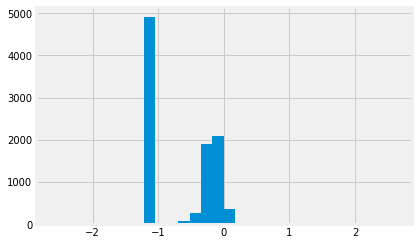

In [18]:
np.log10(final_df['avgEER']).replace(-np.inf, np.nan).hist(bins=30);

In [19]:
final_df.to_csv("final_df.csv")